In [1]:
!pip install cudf-cu11 dask-cudf-cu11 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.nvidia.com


In [2]:
!pip install cuml-cu11 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.nvidia.com
  Using cached https://pypi.nvidia.com/cuml-cu11/cuml_cu11-23.2.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1586.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 GB 1.6 MB/s eta 0:00:00
  Using cached https://pypi.nvidia.com/raft-dask-cu11/raft_dask_cu11-23.2.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (215.1 MB)
  Using cached treelite-3.1.0-py3-none-manylinux2014_x86_64.whl (873 kB)
  Using cached treelite_runtime-3.1.0-py3-none-manylinux2014_x86_64.whl (191 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.2/240.2 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 102.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 6.4 MB/s eta 0:00:00


In [3]:
!pip install cugraph-cu11 --extra-index-url=https://pypi.nvidia.com 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.4 MB/s eta 0:00:00


In [54]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv("/content/Book1.csv")

In [55]:
df.head(15)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
5,1,gasoline,10,109,7.8,66,1
6,1,gasoline,10,103,9.7,65,1
7,1,gasoline,10,95,12.0,60,1
8,1,gasoline,10,102,13.3,55,1
9,1,gasoline,10,93,15.4,52,1


In [56]:
df.isnull().sum()
#test for missing values

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [57]:
import matplotlib.pyplot as plt


<AxesSubplot:>

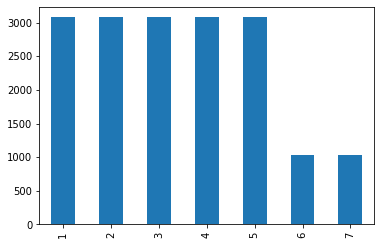

In [58]:
df["SIZE"].value_counts().plot(kind = 'bar')
#To visualize the values given by The class size and their number anc compare them

In [94]:
import seaborn as sns
df.info()
x = df.iloc[:,:-1]
#Extract basic info about the dataset

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SIZE       17442 non-null  int64
 1   FUEL       17442 non-null  uint8
 2   DISTANCE   17442 non-null  int64
 3   DESIBEL    17442 non-null  int64
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64
 6   STATUS     17442 non-null  int64
dtypes: float64(1), int64(5), uint8(1)
memory usage: 834.6 KB


In [60]:
df.isnull().sum()
#to check for the null values

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [61]:
df.corr()
#to see the corelation matrix

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
SIZE,1.000000e+00,-2.437871e-15,-6.125585e-15,1.677898e-16,9.978281e-17,-0.096947
DISTANCE,-2.437871e-15,1.000000e+00,-2.385897e-01,-7.074906e-01,-2.452947e-17,-0.644051
DESIBEL,-6.125585e-15,-2.385897e-01,1.000000e+00,3.769153e-01,5.617409e-01,0.203970
AIRFLOW,1.677898e-16,-7.074906e-01,3.769153e-01,1.000000e+00,-2.120462e-01,0.760628
FREQUENCY,9.978281e-17,-2.452947e-17,5.617409e-01,-2.120462e-01,1.000000e+00,-0.244203
STATUS,-9.694718e-02,-6.440506e-01,2.039698e-01,7.606279e-01,-2.442030e-01,1.000000


<AxesSubplot:>

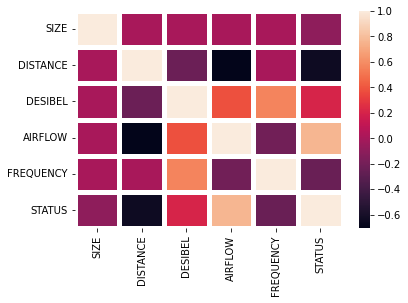

In [62]:
sns.heatmap(df.corr(),linewidths=5)
# as nothing can be made up from the matrix above, we generate a heatmap using seaborn

The highest correlation can be observed among airflow and sound(desibel)

In [63]:
rf = RandomForestClassifier()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#using labelencoder to give a value to the classifiction feature which is fuel in our case
df["FUEL"] = le.fit_transform(df["FUEL"])

In [64]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [65]:
from sklearn.model_selection import train_test_split
#splitting the data for training and testing
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=43 , test_size = 0.25)


In [66]:
start = time.time()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
accuracy_score(pred,y_test)
end = time.time()
print(f'time taken for fitting the model {end-start} seconds')
#using Time library to calculate time between starting and ending of code execution
# This will give is the time taken to fit our model



time taken for fitting the model 0.9481418132781982 seconds


Time taken is 0.94 seconds

In [67]:
from sklearn.metrics import classification_report
#classification report for prediction uning sklearn
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2220
           1       0.96      0.96      0.96      2141

    accuracy                           0.96      4361
   macro avg       0.96      0.96      0.96      4361
weighted avg       0.96      0.96      0.96      4361



Now Using CudaML 

In [95]:
import cudf


In [96]:
from cuml.ensemble import RandomForestClassifier
from cuml.preprocessing import LabelEncoder


In [97]:
df = cudf.read_csv('/content/Book1.csv')
df["FUEL"].unique()

0    gasoline
1    kerosene
2         lpg
3     thinner
Name: FUEL, dtype: object

In [98]:
lb = LabelEncoder()
df["FUEL"] = lb.fit_transform(df["FUEL"])
df["FUEL"].value_counts()
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [101]:
from cuml.model_selection import train_test_split
import time

x_trainCUDA, x_testCUDA, y_trainCUDA, y_testCUDA = train_test_split(x,y,test_size = 0.25,random_state = 43)

In [102]:
start = time.time()
rc = RandomForestClassifier()
rc.fit(x_trainCUDA, y_trainCUDA)
pred_CUDA = rc.predict(x_testCUDA)
end = time.time()
print(f'time taken for fitting the model {end-start} seconds')

time taken for fitting the model 0.9770562648773193 seconds


Time taken is 0.97s

In [103]:
from cuml.metrics import accuracy_score
accuracy_score(pred_CUDA,y_testCUDA)

0.8924311995506287

In [105]:
print(classification_report(pred_CUDA.to_numpy(),y_testCUDA.to_numpy()))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      2233
         1.0       0.89      0.89      0.89      2127

    accuracy                           0.89      4360
   macro avg       0.89      0.89      0.89      4360
weighted avg       0.89      0.89      0.89      4360



In [ ]:
# The time taken is identical i.e 0.94 and 0.97 secs but major differences can be observed using bigger datasets

#Accuracy although depends upon the test data is 0.96 and 0.89 respectively